<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module2/M2_2/2_TheSimplexMethod_Maximization2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Simplex Method: 2D Maximization
**OPIM 5641: Business Decision Modeling - University of Connecticut**

Material from: "Elementary Linear Algebra" - 8th Edition (Ron Larson) - Chapter 9.

---------------------------------------------------------------------------
**Objectives:**
* Write the simplex tableau for a linear programming problem. 
* Use pivoting to find an improved solution.  
* Use the simplex method to solve a linear programming problem that maximizes an objective function.  
* Use the simplex method to find an optimal solution to a real-world application.

Please run these cells before we get started. We'll need them to make nicely shaded plots and tables later on.

In [ ]:
# import modules
# Matrix makes a sympy Matrix, Rational is FRACTION, pprint makes it pretty print, nsimplify converts decimals to fractions (rational numbers)
from sympy import Matrix, Rational, pprint, nsimplify 

# standard modules
import numpy as np
import pandas as pd

In [ ]:
# this is a helpful function for coloring a cell in a table

# Custom function to color the desired cell
def styling_specific_cell(x,row_idx,col_idx):
    color = 'background-color: yellow; color: red'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler

**Background:** For linear programming problems involving two variables, the graphical solution method is convenient. For problems involving more than two variables or large numbers of constraints, it is better to use methods that are adaptable to technology. One such method is the simplex method, developed by George Dantzig in 1946. It provides a systematic way of examining the vertices of the feasible region to determine the optimal value of the objective function. 

Say you want to find the maximum value of $z = 4x_1 + 6x_2$, where the decision variables $x_1$ and $x_2$ are nonnegative, subject to the constraints:

* $-x_1 + x_2 \leq 11$
* $x_1 + x_2 \leq 27$
* $2x_1 + 5x_2 \leq 90$


The **left-hand side** (LHS) of each **inequality** is less than or equal to the right-hand side, *so there must exist nonnegative numbers $s_1$, $s_2$, and $s_3$ that can be added to the left side of each equation to produce the system of linear equations!* 

* $\;-x_1 \;+ \;\;x_2 + s_1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = 11$
* $\;\;\;\; x_1 \;+ \;\;x_2 \;\;\;\;\;\;\;\; + s_2 \;\;\;\;\;\;\;\; = 27$
* $\;\;\;2x_1 + 5x_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;+ s_3 = 90$



The numbers $s_1$, $s_2$, and $s_3$ are called slack variables because they represent the **“slack”** in each inequality. Slack just means any unused part - sometimes there are unused hours (painting constraint from furniture example) - and sometimes there's nothing leftover and the slack is zero (this is called a **binding constraint**). More on this a little later on.

Even though we have 2 decision variables, $x_1$, $x_2$, note that we have 3 slack variables ($s_1$, $s_2$, and $s_3$)! One slack variable per constraint.

For now, you should be able to write the LP problem in **standard form for a maximization problem** (constraints written with slack variables on LHS, there are ONLY less than or equal to ($\leq$) inequalities which we turn into equal signs, and the RHS remains the same). 


# Simplex Solution
A basic solution of a linear programming problem in standard form is a solution $(x_1, x_2, .  .  . , x_n, s_1, s_2, .  .  . , s_m)$ of the constraint equations in which at most $m$ variables are nonzero, and the variables that are nonzero are called **basic variables**. A basic solution for which all variables are nonnegative is a **basic feasible solution**. The simplex method is carried out by performing elementary row operations on a matrix called the **simplex tableau** (shown below for our problem). 

In the tableau, it is customary to omit the coefficient of z. For example, the **initial simplex tableau** for the linear programming problem






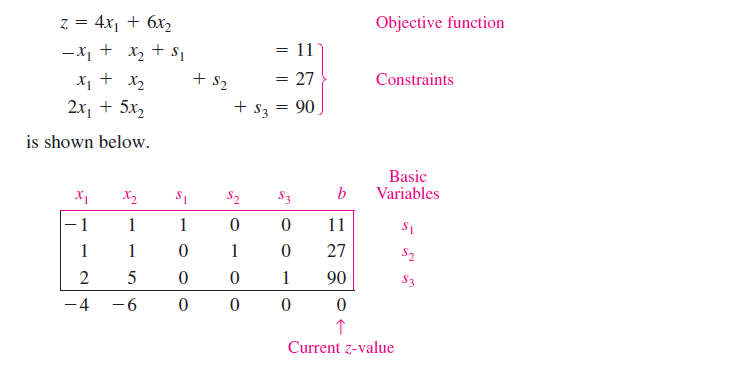

### a brief note on $z$
Notice how all of our constraints have a constant for the RHS? We need our objective function to look the same way. That's why we are rearranging terms and have -4 and -6 instead of 4 and 6. 

Note how the objective is on the BOTTOM of the tableau and that there are -4 and -6 instead of 4 and 6. This is because $z$ needs to be on the RHS and can't be negative! The entry in the lower right corner of the simplex tableau is the current value of $z$. Notice how the initial value of $z$ is 0. Hence, the starting values of $x_1$ and $x_2$ are also 0.

Right now, the **basic variables** are $s_1$, $s_2$ and $s_3$ and the **nonbasic variables** are $x_1$ and $x_2$. This is a basic feasible solution starting off...

$x_1$ = 0 `nonbasic`

$x_2$ = 0 `nonbasic`

$s_1$ = 11 `basic (nonzero)`

$s_2$ = 27 `basic (nonzero)`

$s_3$ = 90 `basic (nonzero)`

And the solution is often written as:
$(x_1, x_2, s_1, s_2, s_3) = (0, 0, 11, 27, 90)$

To perform an optimality check for a solution represented by a simplex tableau, look at the entries in the bottom row of the tableau. If any of these entries are **negative** (as above), then the current solution is **not optimal** even though it might be **feasible**.


# Pivoting

After you have set up the initial simplex tableau for a linear programming problem, the simplex method consists of checking for optimality and then, when the current solution is not optimal, improving the current solution. (An improved solution is one that has a larger $z$ value than the current solution.) 

To improve the current solution, bring a new basic variable into the solution, the entering variable. This implies that one of the current basic variables (the departing variable) must leave, otherwise you would have too many variables for a basic solution. Choose the entering and departing variables as listed below. 

1. The **entering variable** corresponds to the least (the most negative) entry in the bottom row of the tableau, excluding the “b-column.” You're looking for the BIGGEST negative number (choose -10 instead of -1).
2.  The **departing variable** corresponds to the least nonnegative ratio $b_i/$$a_i$$_j$ in the column determined by the entering variable, when $a_i$$_j$ $> 0$  (for example, if one ratio $b/a = 5$ and one $b/a = 50$ - choose the row with $b/a = 5$ because it's the smallest positive ratio! Ignore anything with a negative ratio.)
3.  The entry in the simplex tableau in the entering variable’s column and the departing variable’s row is the **pivot**. 

Finally, to form the improved solution, apply Gauss-Jordan elimination (https://online.stat.psu.edu/statprogram/reviews/matrix-algebra/gauss-jordan-elimination) to the column that contains the pivot, as illustrated in Example 1.
 

# Pivot #1
Let's use the simplex method to find an improved solution for the linear programming problem represented by the tableau shown below. We will use numpy to perform all operations (corresponds to textbook example). We will call this matrix $A$.


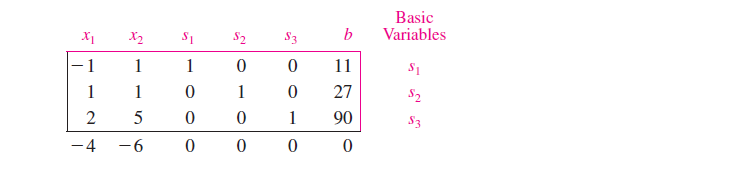

In [ ]:
from sympy import Matrix, Rational, pprint, nsimplify
import numpy as np
import pandas as pd

A = Matrix([[-1, 1, 1, 0, 0, 11], #R0
              [1,1,0,1,0,27], #R1
              [2,5,0,0,1,90], #R2
              [-4,-6,0,0,0,0]]) #R3

# print it
pprint(A) # voila - looks great! don't forget the extra p for pretty print

⎡-1  1   1  0  0  11⎤
⎢                   ⎥
⎢1   1   0  1  0  27⎥
⎢                   ⎥
⎢2   5   0  0  1  90⎥
⎢                   ⎥
⎣-4  -6  0  0  0  0 ⎦


In [ ]:
# make it pretty
tmp = pd.DataFrame(np.array(A)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 's1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']
tmp

,x1,x2,s1,s2,s3,b
R0,-1,1,1,0,0,11
R1,1,1,0,1,0,27
R2,2,5,0,0,1,90
R3,-4,-6,0,0,0,0


## Entering Variable

Note that the current solution $(x_1 = 0, x_2 = 0, s_1 = 11, s_2 = 27, s_3 = 90)$ corresponds to a z-value of 0. This is a feasible but terrible solution - it's the do-nothing solution! Satisfies all constraints but doesn't really help us...

**Entering Variable**
To improve this solution, choose $x_2$ as the **entering variable**, because −6 is the least entry in the bottom row (largest negative number!)






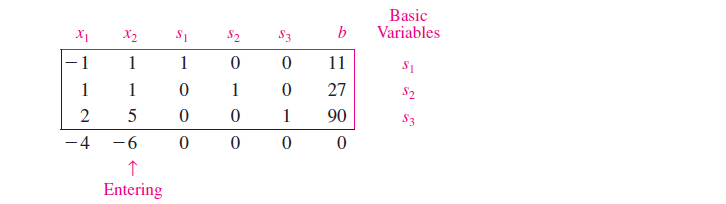

To see why you choose $x_2$ as the entering variable, remember that $z = 4x_1 + 6x_2$. So, it appears that a unit change in $x_2$ produces a change of 6 in $z$, whereas a unit change in $x_1$ produces a change of only 4 in $z$.

In [ ]:
# let's show this in code
# make it pretty
tmp = pd.DataFrame(np.array(A)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 's1', 's2', 's3', 'b']
tmp.index=['R0', 'R1', 'R2', 'R3']
tmp

# apply style to a column
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x2' else '' for i in x])



,x1,x2,s1,s2,s3,b
R0,-1,1,1,0,0,11
R1,1,1,0,1,0,27
R2,2,5,0,0,1,90
R3,-4,-6,0,0,0,0


## Departing Variable


**Departing Variable**

Time to calculate your $b/a$ ratio! where $a$ is your entering variable column...

To find the departing variable, locate the $b$’s that have corresponding **positive elements** in the entering variable’s column and form the ratios 

$11/1 = 11$ `[smallest nonnegative ratio!]`

$27/1 = 27$

$90/5 = 18$. 

Here the least nonnegative ratio is 11, so choose $s_1$ as the departing variable.




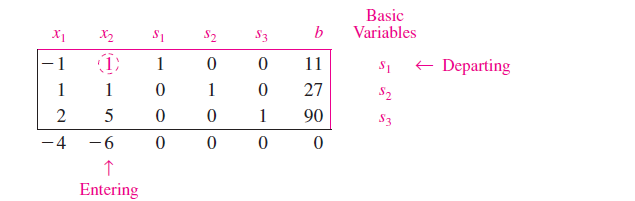


**Intersection**

If you highlight the column with the **entering variable** and the row with the **departing variable**, it forms an intersection! This intersection is know as the **pivot element**.

Note that the pivot is the entry in the first row and second column. Now, use **Gauss-Jordan elimination** to obtain the improved solution shown below. This means turn all of the entries below the pivot element to 0 (including the last row).



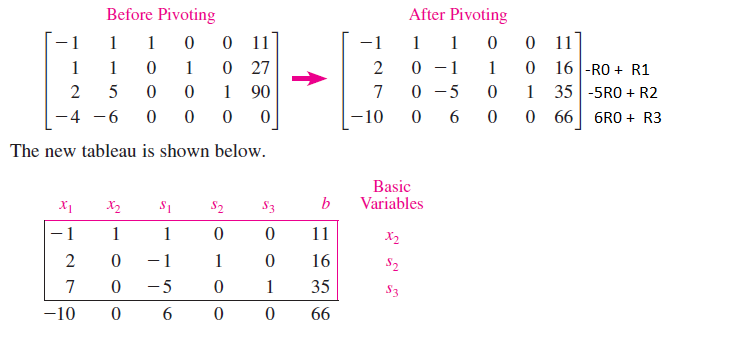

In [ ]:

# make it pretty
tmp = pd.DataFrame(np.array(A).astype(float)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 's1', 's2','s3', 'b']
tmp.index=['R0', 'R1', 'R2','R3'] # row 0, row 1, row 2, row 3 (R3)
tmp

# add some color to highlight R0 and x2 

# style - this is for an individual cell (Pivot element)
idx_r = 0   # Row index of cell to color
idx_c = 1   # Column index of cell to color 

#coloring departing variable/row(R0) and entering column/variable(x2)
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x2' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R0' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None)



,x1,x2,s1,s2,s3,b
R0,-1.000000,1.000000,1.000000,0.000000,0.000000,11.000000
R1,1.000000,1.000000,0.000000,1.000000,0.000000,27.000000
R2,2.000000,5.000000,0.000000,0.000000,1.000000,90.000000
R3,-4.000000,-6.000000,0.000000,0.000000,0.000000,0.000000


## Gauss-Jordan Elimination
Simply stated, you are adding multiples of the row with the pivot element to the other remaining rows, with the goal of creating 0s in the column with the pivot element.

More details here (optional): https://online.stat.psu.edu/statprogram/reviews/matrix-algebra/gauss-jordan-elimination

In [ ]:
# let's do this with A

# we need to get rid of everything BELOW the pivot element (the '1' in R1, the '5' in R2, and the '-6' in R3)

# Gauss-Jordan elimination just means getting rid of these values below the pivot element ( R0)
# by adding multiples of R1 to all the other rows.

# let's work our way down 
# to get rid of the '1' in R1

# here is R1 
A[1,:]

Matrix([[1, 1, 0, 1, 0, 27]])

In [ ]:
# and here is how we update it!
# -R0 + R1
A[1,:] = -A[0,:] + A[1,:]
A[1,:]

Matrix([[2, 0, -1, 1, 0, 16]])

In [ ]:
# now do the next one, let's get rid of the '5' in R2
# -5R0 + R1 should do the trick
A[2,:] = -5*A[0,:] + A[2,:]
A[2,:] # check your work! good!

Matrix([[7, 0, -5, 0, 1, 35]])

In [ ]:
# one more to go!
# let's get rid of the '-6' in R3
# 6R0 + R3
A[3,:] = 6*A[0,:] + A[3,:]
A[3,:] # check your work! all looks great!

Matrix([[-10, 0, 6, 0, 0, 66]])

And now let's look at A after Gauss-Jordan elimination. 

Is it a feasible solution? Sure is.

In [ ]:
# and now let's look at A after Gauss-Jordan elimation
pprint(A)

⎡-1   1  1   0  0  11⎤
⎢                    ⎥
⎢ 2   0  -1  1  0  16⎥
⎢                    ⎥
⎢ 7   0  -5  0  1  35⎥
⎢                    ⎥
⎣-10  0  6   0  0  66⎦


In [ ]:
# want to see it with nice headers?
# use pandas
tmp = pd.DataFrame(np.array(A))
tmp.columns = ['x1', 'x2', 's1', 's2', 's3', 'b']
tmp

,x1,x2,s1,s2,s3,b
0,-1,1,1,0,0,11
1,2,0,-1,1,0,16
2,7,0,-5,0,1,35
3,-10,0,6,0,0,66


Note that $x_2$ has replaced $s_1$ in the basic variables column and the improved solution $(x_1, x_2, s_1, s_2, s_3) = (0, 11, 0, 16, 35)$ has a $z$ value of $z = 4x_1 + 6x_2 = 4(0) + 6(11) = 66$. 

Also note that the basic variables are $x_2$, $s_2$ and $s_3$. These are columns (variables) with a single '1' and the rest of the values are '0'.





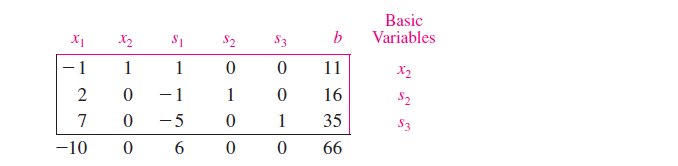

Are we done? **NO!** There's still a negative number in the bottom row (our objective function). So we have a basic feasible solution but not an optimal solution.

# Pivot #2
The improved solution (above) is not optimal because the bottom row has a negative entry. So, apply another iteration of the simplex method to improve the solution further. Choose $x_1$ as the entering variable. Moreover, the lesser of the ratios $16/2 = 8$ and $35/7 = 5$ is $5$, so $s_3$ ($R2$) is the departing variable. Gauss-Jordan elimination produces the matrices shown below. 


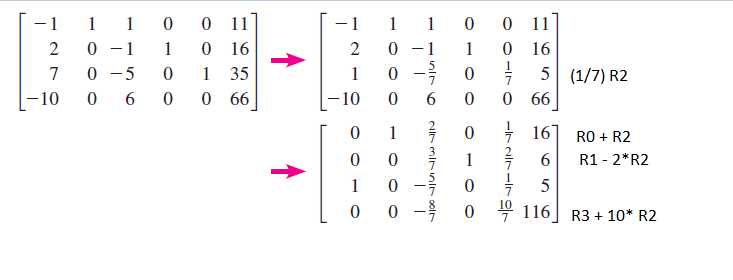

In [ ]:

# make it pretty
tmp = pd.DataFrame(np.array(A).astype(float)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 's1', 's2','s3', 'b']
tmp.index=['R0', 'R1', 'R2','R3']
tmp

# style - this is for an individual cell
idx_r = 2   # Row index of cell to color
idx_c = 0   # Column index of cell to color 


tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'x1' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R2' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None)

,x1,x2,s1,s2,s3,b
R0,-1.000000,1.000000,1.000000,0.000000,0.000000,11.000000
R1,2.000000,0.000000,-1.000000,1.000000,0.000000,16.000000
R2,7.000000,0.000000,-5.000000,0.000000,1.000000,35.000000
R3,-10.000000,0.000000,6.000000,0.000000,0.000000,66.000000


In [ ]:
# first, we need to turn the pivot element in R2 (A[2]) into a '1'
# we do this by multiplying this row by (1/7*R2)
from fractions import Fraction as Fraction

# notice how we index a sympy matrix [rows,columns]
# A[2,:] means the third row and all of the columns...

A[2,:] = (Fraction(1,7)*A[2,:])
pprint(A)

⎡-1   1   1    0   0   11⎤
⎢                        ⎥
⎢ 2   0   -1   1   0   16⎥
⎢                        ⎥
⎢ 1   0  -5/7  0  1/7  5 ⎥
⎢                        ⎥
⎣-10  0   6    0   0   66⎦


In [ ]:
# now we keep going

# For R0
A[0,:] = A[0,:] + A[2,:]
# For R1
A[1,:] = A[1,:] - 2*A[2,:]
# For R3
A[3,:] = A[3,:] + 10*A[2,:]

# show what you did - the 2/7 above should be -2/7 (our answer is correct, can fix this)
pprint(A)

⎡0  1  2/7   0  1/7   16 ⎤
⎢                        ⎥
⎢0  0  3/7   1  -2/7   6 ⎥
⎢                        ⎥
⎢1  0  -5/7  0  1/7    5 ⎥
⎢                        ⎥
⎣0  0  -8/7  0  10/7  116⎦


Notice how this matches the image above.

Evaluating what we did, our objective function has grown to 116 but we still have work to do! We do not have an optimal solution because there is a negative value in the bottom row...

# Pivot #3
We look for the negative row in the bottom to identify the entering variable - the departing variable is the smallest **postive** ratio of b/a... which is s2.


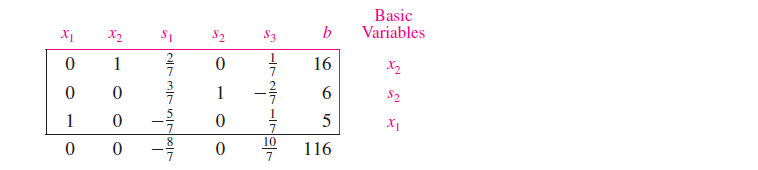

In [ ]:
# departing variable?... aren't you glad you are using SymPy?!
print(16/(2/7)) #  x2 (R0)
print(6/(3/7)) # s2 (R1, smallest positive b/a ratio = winner!)

56.0
14.0


In [ ]:
# make it pretty
tmp = pd.DataFrame(np.array(A)) # you only need this in the first example
tmp.columns = ['x1', 'x2', 's1', 's2','s3', 'b']
tmp.index=['R0', 'R1', 'R2','R3']
tmp

# style - this is for an individual cell
idx_r = 1   # Row index of cell to color
idx_c = 2   # Column index of cell to color 


tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 's1' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R1' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None)

,x1,x2,s1,s2,s3,b
R0,0,1,2/7,0,1/7,16
R1,0,0,3/7,1,-2/7,6
R2,1,0,-5/7,0,1/7,5
R3,0,0,-8/7,0,10/7,116


Now we have to turn this pivot element into a '1', so we multipy this row (R1) by 7/3 which will cancel out the 3/7.

In [ ]:
# make a '1' in the pivot element
A[1,:] = Fraction(7,3)*A[1,:]
pprint(A) 

⎡0  1  2/7    0   1/7   16 ⎤
⎢                          ⎥
⎢0  0   1    7/3  -2/3  14 ⎥
⎢                          ⎥
⎢1  0  -5/7   0   1/7    5 ⎥
⎢                          ⎥
⎣0  0  -8/7   0   10/7  116⎦


In [ ]:
# now get rid of all of the values below 
# and above it

# Remember, leave the rows of interest (R0, R2, R3) alone!
# and add multiples of R1 to them

# we need to add -2/7 of R1 to R0
# we need to add 5/7 R1 to R2
# we need to add 8/7 R1 to R3

# now do it!
A[0,:] = A[0,:] - Fraction(2,7)*A[1,:]
A[2,:] = A[2,:] + Fraction(5,7)*A[1,:] 
A[3,:] = A[3,:] + Fraction(8,7)*A[1,:] 

# check your work!
pprint(A)

⎡0  1  0  -2/3  1/3   12 ⎤
⎢                        ⎥
⎢0  0  1  7/3   -2/3  14 ⎥
⎢                        ⎥
⎢1  0  0  5/3   -1/3  15 ⎥
⎢                        ⎥
⎣0  0  0  8/3   2/3   132⎦


Do you see any negative values? NOPE!
We did it!

THIS is our optimal solution. To read it off, it may be helpful to convert to a Pandas DataFrame so that you have labels.

In [ ]:
import pandas as pd
tmp = pd.DataFrame(np.array(A))
tmp.columns = ['x1', 'x2', 's1', 's2', 's3', 'b']
tmp

,x1,x2,s1,s2,s3,b
0,0,1,0,-2/3,1/3,12
1,0,0,1,7/3,-2/3,14
2,1,0,0,5/3,-1/3,15
3,0,0,0,8/3,2/3,132


Now read that table:
* $x_1 = 15$
* $x_2 = 12$
* $s_1 = 14$
* $s_2 = 0$
* $s_3 = 0$ 
* $z = 132$

A compact way of writing this is: 
$(x_1, x_2, s_1, s_2, s_3) = (15, 12, 14, 0, 0)$
with
$z = 4x_1 + 6x_2 = 4*(15) + 6*(12) = 132$

# What did we learn?
This linear programming problem involved only two decision variables, $x_1$ and $x_2$, so you could have used a graphical solution technique. Notice in the figure below that each iteration in the simplex method corresponds to moving from one vertex to an adjacent vertex with an improved z-value. Here's a picture:





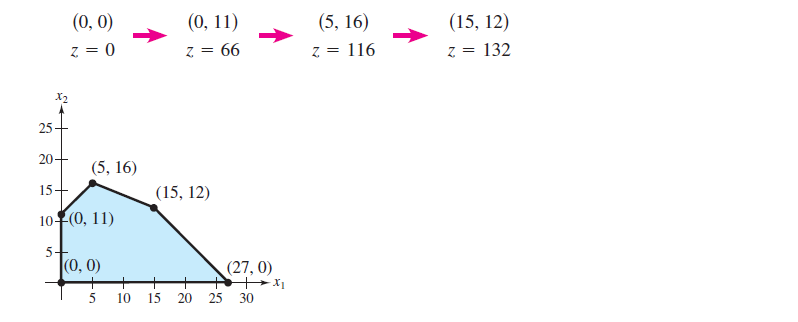

But the best part of Simplex is not that you can skip over finding the intersection of a bunch of different constraints and shading - but that you can ALSO extend this methodology to more than one dimension! See future examples.

# Summary: The Simplex Method (Standard Form) 
To solve a linear programming problem in standard form, use the steps below. 
1.  Convert each inequality in the set of constraints to an equation by adding slack variables. 
2. Create the initial simplex tableau. 
3.  Locate the most negative entry in the bottom row, excluding the “b-column.” This entry is called the entering variable, and its column is the entering  column. (If ties occur, then any of the tied entries can be used to determine the entering column.) 
4.  Form the ratios of the entries in the “b-column” with their corresponding positive entries in the entering column. (If all entries in the entering column are 0 or negative, then there is no maximum solution.) The departing row corresponds to the least nonnegative ratio $b_i/$$a_i$$_j$. (For ties, choose any  corresponding row.) The entry in the departing row and the entering  column is called the pivot. 
5.  Use elementary row operations to change the pivot to 1 and all other entries in the entering column to 0. This process is called pivoting. 
6.  When all entries in the bottom row are zero or positive, this is the final  tableau. Otherwise, go back to Step 3. 
7.  If you obtain a final tableau, then the linear programming problem has a maximum solution. The maximum value of the objective function is the entry in the lower right corner of the tableau.


# Appendix: Code from colorful tables


In [ ]:
# awesome latex symbols! 
# https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols
# http://www.emerson.emory.edu/services/latex/latex_119.html

In [ ]:
# a random sample array

A = Matrix([[60,   12,   10,   1,  0,  0.12],
            [60,    6,   30,   0,  1,  0.15],                      
            [-300,  -36,  -90,  0,  0,   0]])

# make it pretty
tmp = pd.DataFrame(np.array(A).astype(float)) # you only need this in the first example
tmp.columns = ['y1', 'y2', 'y3', 's1', 's2', 'b']
tmp.index=['R0', 'R1', 'R2']
tmp

# add some color to highlight s1 and s2 and z
# Custom function to color the desired cell
def styling_specific_cell(x,row_idx,col_idx):
    color = 'background-color: yellow; color: red'
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    df_styler.iloc[row_idx, col_idx] = color
    return df_styler

# highlight a single cell pivot element
idx_r = 0
idx_c = 0

# apply style to rows and columns
tmp.style\
.apply(lambda x: ['background: lightblue' if x.name == 'y1' else '' for i in x])\
.apply(lambda x: ['background: lightblue' if x.name == 'R0' else '' for i in x], axis=1)\
.apply(styling_specific_cell, row_idx = idx_r, col_idx = idx_c, axis = None)


,y1,y2,y3,s1,s2,b
R0,60.000000,12.000000,10.000000,1.000000,0.000000,0.120000
R1,60.000000,6.000000,30.000000,0.000000,1.000000,0.150000
R2,-300.000000,-36.000000,-90.000000,0.000000,0.000000,0.000000


# Appendix: spacing out mathematical symbols
Double click this text cell to see how much spacing is required... it's a lot! Also take a look at how to make a table in a Colab notebook.

$z = 4x_1 + 6x_2$

$\;-x_1 \;+ \;\;x_2 + s_1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = 11$

$\;\;\;\; x_1 \;+ \;\;x_2 \;\;\;\;\;\;\;\; + s_2 \;\;\;\;\;\;\;\; = 27$

$\;\;\;2x_1 + 5x_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;+ s_3 = 90$

is shown as

$x_1$ | $x_2$ | $s_1$ | $s_2$ | $s_3$ | $b$
--- | --- | --- | --- | --- | ---
-1 | 1| 1 | 0| 0| 11
1  | 1| 0 |1 |0 |27
2  |5 |0  |0 |1 |90
-4 |-6|0  |0 |0 |**0 ($z$)**

# Appendix: simple Simplex steps


1.   Look for largest negative number in bottom row of initial simplex tableau - this gives you the column of interest. (for first pivot, this is $x_2$)
2.   Now we need to find which row. Calculate $b/a$ where $b$ is column $b$ and $a$ is the column of interest. The SMALLEST POSITIVE $b/a$ gives you the pivot element.  Where 1 and 2 intersect gives you the **pivot element**.
3. Make sure the **pivot element** is equal to 1. 
  * If it is, great! Go to step 4.
  * If not, multiply by a fraction to turn pivot element into a 1.
4. Use Gauss-Jordan elimination - make everything above and below the pivot element a 0. 
5. Check your work - if there are no negative numbers in the bottom row - you're done? If there's a negative number, repeat Steps 1 - 5. 

